## Demonstration of the usage of the VO TAP protocol from vo.astron.nl

In this notebook we show how you can access tables using the TAP protocol by loading tables from the ASTRON VO prototype service.

There will be some warnings in the output. We don't worry about those in this demo.

We start by importing the pyvo package:

In [14]:
import pyvo as vo

The VO supports different protocols. The one we will have a look at here is the Table Access Protocol (TAP). Let's start by listing all the VO TAP services in the central registry:

In [15]:
services=vo.regsearch(servicetype='tap')
for service in services:
  print(service.ivoid)

ivo://aip.gavo.org/tap
ivo://archive.stsci.edu/caomtap
ivo://archive.stsci.edu/hsctap
ivo://archive.stsci.edu/hscv2tap
ivo://archive.stsci.edu/hscv3tap
ivo://archive.stsci.edu/ps1dr2tap
ivo://archive.stsci.edu/regtap
ivo://asdc/tap
ivo://astro.ucl.ac.uk/tap
ivo://asu.cas.cz/tap
ivo://au.csiro/atoavo/tap
ivo://au.csiro/casda/tap
ivo://au.csiro/psrda/atnf_pulsar_data_archive
ivo://bira-iasb/tap
ivo://byu.arvo/tap
ivo://cadc.nrc.ca/tap
ivo://cdpp/amda
ivo://cdpp/cdppdetection
ivo://cdpp/illu67p
ivo://cdpp/swalerts
ivo://cdpp/transplanet
ivo://cds.simbad/tap
ivo://cds.vizier/obstap
ivo://cds.vizier/tap
ivo://chivo/tap
ivo://cxc.harvard.edu/cda
ivo://cxc.harvard.edu/csc
ivo://esavo/ehst/tap
ivo://esavo/esasky/tap
ivo://esavo/gaia/tap
ivo://esavo/hsa/tap
ivo://esavo/psa/epntap
ivo://esavo/registry/tap
ivo://esavo/xmm/tap
ivo://eso.org/tap_cat
ivo://eso.org/tap_obs
ivo://fu-berlin.planet.hrsc/tap
ivo://ia2.inaf.it/hosted/laurino2011/tap
ivo://ia2.inaf.it/iaps/tap
ivo://ia2.inaf.it/tap
ivo://i

Did you see ASTRON? Probably not since it has not been registered in the cenrtal registry. Let's double check:

In [16]:
astronexists = False

for service in services:
  if "astron" in service:
    print(service.ivoid)

if not astronexists:
    print("No VO service containing astron found in the central registry")

No VO service containing astron found in the central registry


Let's connect to the ASTRON TAPservice manually. The address can be found by clicking through on [vo.astron.nl](http://vo.astron.nl) to end up [here](https://vo.astron.nl/__system__/tap/run/info)

In [17]:
service = vo.dal.TAPService("https://vo.astron.nl/__system__/tap/run/tap")

Now we have a service object, let's see what tables we have:

In [18]:
for table in service.tables:
  print(table.name)

hetdex.img_main
hetdex.hetdex_images
ivoa.obscore
ivoa.emptyobscore
lbcs.main
lofartier1.img_main
msss.img_main
mvf.main
mvf.msssvf_img_main
sauron.main
sauron.mom0
tap_schema.schemas
tap_schema.tables
tap_schema.columns
tap_schema.keys
tap_schema.key_columns
tap_schema.groups
tgssadr.main
tgssadr.img_main


Let's pick one of those tables (sauron.main) and query the contents (basically select all entries):

In [19]:
sauron_resultset = service.search("SELECT * FROM sauron.main")

We can actually have a look at the field descriptions of each result:

In [20]:
sauron_resultset.fielddescs

[<FIELD ID="accref" arraysize="*" datatype="char" name="accref" utype="Access.Reference"/>,
 <FIELD ID="owner" arraysize="*" datatype="char" name="owner"/>,
 <FIELD ID="embargo" arraysize="*" datatype="char" name="embargo" unit="a" xtype="timestamp"/>,
 <FIELD ID="mime" arraysize="*" datatype="char" name="mime" ucd="meta.code.mime" utype="Access.Format"/>,
 <FIELD ID="accsize" datatype="long" name="accsize" ucd="VOX:Image_FileSize" unit="byte" utype="Access.Size"/>,
 <FIELD ID="centeralpha" datatype="double" name="centeralpha" ref="system" ucd="POS_EQ_RA_MAIN" unit="deg"/>,
 <FIELD ID="centerdelta" datatype="double" name="centerdelta" ref="system" ucd="POS_EQ_DEC_MAIN" unit="deg"/>,
 <FIELD ID="imagetitle" arraysize="*" datatype="char" name="imagetitle" ucd="VOX:Image_Title"/>,
 <FIELD ID="instid" arraysize="*" datatype="char" name="instid" ucd="INST_ID"/>,
 <FIELD ID="dateobs" datatype="double" name="dateobs" ref="system" ucd="VOX:Image_MJDateObs" unit="d" xtype="mjd"/>,
 <FIELD ID="n

Those are tables with images. The object `sauron_resultset` is a list of rows which each contains columns of data (i.e. a table). Let's have a look at the first row (note that the order of the fields is the same as in the listing aboce) and save it to fits. 

In [21]:
print(sauron_resultset[0])
sauron_resultset[0].cachedataset(filename='data.fits')

(b'https://vo.astron.nl/getproduct/wow/data/sauron/ngc1023.Velo.High.fits', b'', b'', b'image/fits', 4233600, 40.1014299563715, 39.0622222800279, b'', b'WSRT', 53293.1875949074, 3, masked_array(data=[1024, 1024, 1],
             mask=[False, False, False],
       fill_value=999999,
            dtype=int32), masked_array(data=[0.0011111099738627672, 0.0011111199855804443],
             mask=[False, False],
       fill_value=1e+20,
            dtype=float32), b'ICRS', nan, b'NCP', masked_array(data=[513.0, 513.0],
             mask=[False, False],
       fill_value=1e+20,
            dtype=float32), masked_array(data=[40.0999989639, 39.0633334267],
             mask=[False, False],
       fill_value=1e+20), masked_array(data=[-0.0011111099738627672, 0.0, 0.0,
                   0.0011111099738627672],
             mask=[False, False, False, False],
       fill_value=1e+20,
            dtype=float32), b'', b'm', nan, nan, nan, b'', masked_array(data=[40.82678237511212, 38.48511428039695,


Let's load the fits module from astropy and load the file.

In [22]:
from astropy.io import fits
image_data = fits.getdata("data.fits", ext=0)

Let's see what the dimensions of the image are:

In [23]:
image_data.shape

(1, 1024, 1024)

So the shape of this image is that of a 3D data cube. If we want to plot it, we need to bring it back to a 2D image (yes, this is a pretty trivial case).

In [24]:
plot_data = image_data[0]

Ok. Now let's load matplotlib and plot it.

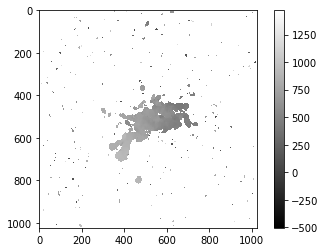

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.imshow(plot_data, cmap='gray')
plt.colorbar();